# **RESULT ANALYSIS NOTEBOOK**
### Martí Cortada Garcia
---

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

def return_number_from_string(input_string):
    numbers = "".join([char for char in input_string if char.isdigit()])
    return numbers

def Fnorm(A, B):
    number_of_matrices = len(A)
    Fnorm = 0
    for a, b in zip(A.items(),B.items()):
        Fnorm += np.linalg.norm((a[1]-b[1]), 'fro')
    return Fnorm/number_of_matrices

def get_abs_difference_of_a_given_matrix_position(A, B, i, j):
    number_of_matrices = len(A)
    abs_diff = 0
    for a, b in zip(A.items(),B.items()):
        abs_diff += np.abs(a[1][i][j] - b[1][i][j])
    return abs_diff/number_of_matrices

def get_vector_branch_lengths(A):
    branch_lengths = []
    for a in A.items():
        branch_lengths.append(a[1])
    return branch_lengths


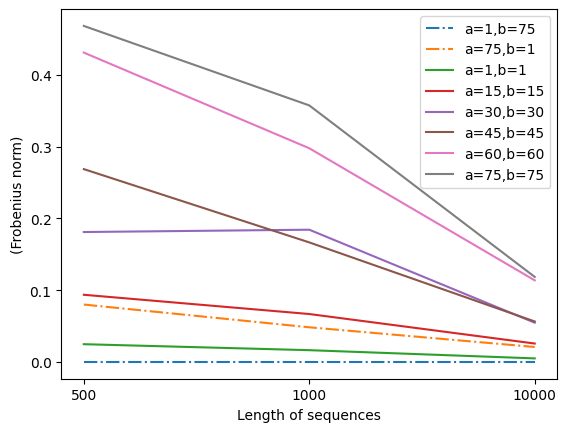

In [4]:
# Load the data
directory = "./OUTPUTS/" 

# Parameters to be compared, which will have 3 positions, concerning its length: [(l=500), (l=1000), (l=10000)]
a1_b75 = np.zeros(3)
a75_b1 = np.zeros(3)
a1_b1 = np.zeros(3)
a15_b15 = np.zeros(3)
a30_b30 = np.zeros(3)
a45_b45 = np.zeros(3)
a60_b60 = np.zeros(3)
a75_b75 = np.zeros(3)

# The last number indicates the idx_i and idx_j of the matrix (i.e. 11 means i=1, j=1)
a1_b75_11 = np.zeros(3)
a75_b1_11 = np.zeros(3)
a1_b1_11 = np.zeros(3)
a15_b15_11 = np.zeros(3)
a30_b30_11 = np.zeros(3)
a45_b45_11 = np.zeros(3)
a60_b60_11 = np.zeros(3)
a75_b75_11 = np.zeros(3)

# Branch lengths
# bl_a1_b75 = np.zeros(3)
# bl_a75_b1 = np.zeros(3)
bl_a1_b1_11 = np.zeros(3)
bl_a15_b15_11 = np.zeros(3)
bl_a30_b30_11 = np.zeros(3)
bl_a45_b45_11 = np.zeros(3)
bl_a60_b60_11 = np.zeros(3)
bl_a75_b75_11 = np.zeros(3)

# Iterate over all files in the directory that are related with RANDOM EM initialisation
for filename in os.listdir(directory):
    if filename.endswith("random") and filename != ".DS_Store":
        bl_a = return_number_from_string(filename.split("_")[1])
        bl_b = return_number_from_string(filename.split("_")[2])
        length = filename.split("_")[3]
        real_root_distr = np.load(directory + filename + "/real_root_distr.npy", allow_pickle=True)
        real_matrices = np.load(directory + filename + "/real_matrices.npy", allow_pickle=True).item()
        for dir_name in os.listdir(directory+filename+"/RESULTS/"):
            if dir_name != ".DS_Store" and filename!="EM_a1_b75_500_random" and filename!="EM_a1_b75_1000_random" and filename!="EM_a1_b75_10000_random":
                res_dir = directory+filename+"/RESULTS/"+dir_name+"/"
                M_estimation = np.load(res_dir+"M_estimation.npy", allow_pickle=True).item()
                estimated_branch_lengths = np.load(res_dir+"estimated_branch_lengths.npy", allow_pickle=True).item()
                root_estimation = np.load(res_dir+"root_estimation.npy", allow_pickle=True)
                Niter = open(res_dir+"Niter.txt", "r").read()
                TExec = open(res_dir+"TExec.txt", "r").read()
                # if bl_a == "1" and bl_b == "75":
                #     if length == "500":
                #         a1_b75[0] = Fnorm(M_estimation, real_matrices)
                #         a1_b75_11[0] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                #     elif length == "1000":
                #         a1_b75[1] = Fnorm(M_estimation, real_matrices)
                #         a1_b75_11[1] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                #     elif length == "10000":
                #         a1_b75[2] = Fnorm(M_estimation, real_matrices)
                #         a1_b75_11[2] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                if bl_a == "75" and bl_b == "1":
                    if length == "500":
                        a75_b1[0] = Fnorm(M_estimation, real_matrices)
                        a75_b1_11[0] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                    elif length == "1000":
                        a75_b1[1] = Fnorm(M_estimation, real_matrices)
                        a75_b1_11[1] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                    elif length == "10000":
                        a75_b1[2] = Fnorm(M_estimation, real_matrices)
                        a75_b1_11[2] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                elif bl_a == "1" and bl_b == "1":
                    if length == "500":
                        a1_b1[0] = Fnorm(M_estimation, real_matrices)
                        a1_b1_11[0] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                    elif length == "1000":
                        a1_b1[1] = Fnorm(M_estimation, real_matrices)
                        a1_b1_11[1] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                    elif length == "10000":
                        a1_b1[2] = Fnorm(M_estimation, real_matrices)
                        a1_b1_11[2] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                elif bl_a == "15" and bl_b == "15":
                    if length == "500":
                        a15_b15[0] = Fnorm(M_estimation, real_matrices)
                        a15_b15_11[0] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                    elif length == "1000":
                        a15_b15[1] = Fnorm(M_estimation, real_matrices)
                        a15_b15_11[1] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                    elif length == "10000":
                        a15_b15[2] = Fnorm(M_estimation, real_matrices)
                        a15_b15_11[2] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                elif bl_a == "30" and bl_b == "30":
                    if length == "500":
                        a30_b30[0] = Fnorm(M_estimation, real_matrices)
                        a30_b30_11[0] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                    elif length == "1000":
                        a30_b30[1] = Fnorm(M_estimation, real_matrices)
                        a30_b30_11[1] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                    elif length == "10000":
                        a30_b30[2] = Fnorm(M_estimation, real_matrices)
                        a30_b30_11[2] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                elif bl_a == "45" and bl_b == "45":
                    if length == "500":
                        a45_b45[0] = Fnorm(M_estimation, real_matrices)
                        a45_b45_11[0] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                    elif length == "1000":
                        a45_b45[1] = Fnorm(M_estimation, real_matrices)
                        a45_b45_11[1] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                    elif length == "10000":
                        a45_b45[2] = Fnorm(M_estimation, real_matrices)
                        a45_b45_11[2] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                elif bl_a == "60" and bl_b == "60":
                    if length == "500":
                        a60_b60[0] = Fnorm(M_estimation, real_matrices)
                        a60_b60_11[0] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                    elif length == "1000":
                        a60_b60[1] = Fnorm(M_estimation, real_matrices)
                        a60_b60_11[1] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                    elif length == "10000":
                        a60_b60[2] = Fnorm(M_estimation, real_matrices)
                        a60_b60_11[2] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                elif bl_a == "75" and bl_b == "75":
                    if length == "500":
                        a75_b75[0] = Fnorm(M_estimation, real_matrices)
                        a75_b75_11[0] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                    elif length == "1000":
                        a75_b75[1] = Fnorm(M_estimation, real_matrices)
                        a75_b75_11[1] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                    elif length == "10000":
                        a75_b75[2] = Fnorm(M_estimation, real_matrices)
                        a75_b75_11[2] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)

x = [500, 1000, 10000]
xi = list(range(len(x)))

plt.plot(xi, a1_b75, label = "a=1,b=75", linestyle="-.")
plt.plot(xi, a75_b1, label = "a=75,b=1", linestyle="-.")
plt.plot(xi, a1_b1, label = "a=1,b=1", linestyle="-")
plt.plot(xi, a15_b15, label = "a=15,b=15", linestyle="-")
plt.plot(xi, a30_b30, label = "a=30,b=30", linestyle="-")
plt.plot(xi, a45_b45, label = "a=45,b=45", linestyle="-")
plt.plot(xi, a60_b60, label = "a=60,b=60", linestyle="-")
plt.plot(xi, a75_b75, label = "a=75,b=75", linestyle="-")
plt.legend()
plt.xticks(xi, x)
plt.xlabel("Length of sequences")
plt.ylabel("(Frobenius norm)") 
plt.show()

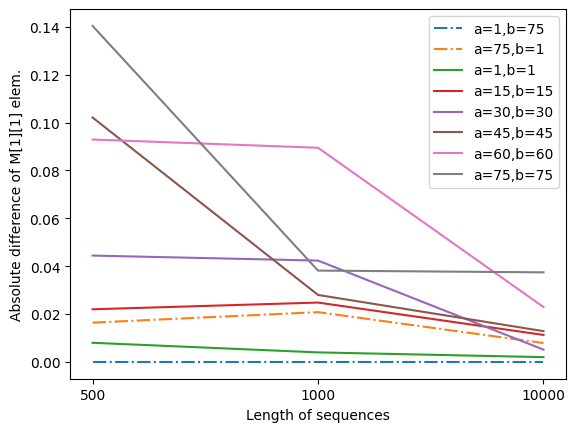

In [5]:
plt.plot(xi, a1_b75_11, label = "a=1,b=75", linestyle="-.")
plt.plot(xi, a75_b1_11, label = "a=75,b=1", linestyle="-.")
plt.plot(xi, a1_b1_11, label = "a=1,b=1", linestyle="-")
plt.plot(xi, a15_b15_11, label = "a=15,b=15", linestyle="-")
plt.plot(xi, a30_b30_11, label = "a=30,b=30", linestyle="-")
plt.plot(xi, a45_b45_11, label = "a=45,b=45", linestyle="-")
plt.plot(xi, a60_b60_11, label = "a=60,b=60", linestyle="-")
plt.plot(xi, a75_b75_11, label = "a=75,b=75", linestyle="-")
plt.legend()
plt.xticks(xi, x)
plt.xlabel("Length of sequences")
plt.ylabel("Absolute difference of M[1][1] elem.") 
plt.show()